In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [ ]:
final_data=pd.read_csv("/content/final_dataset_ready_11.csv")

In [ ]:
final_data.head()

,purchase_amount,customer_rating,engagement_score,purchase_interest_score,customer_engagement_score,monthly_total_spend,monthly_avg_spend,avg_spent_last_3,transaction_id,customer_id_legacy,purchase_date,social_media_platform,review_sentiment
0,408,2.215163,70.0,3.3,43.32,408,408.0,408.0,1001,151,2024-01-15,Facebook,Negative
1,332,4.016621,52.0,4.9,33.16,332,332.0,332.0,1002,192,2024-01-28,Instagram,Positive
2,442,1.984167,78.0,3.6,48.24,442,442.0,442.0,1003,114,2024-01-29,Unknown,Neutral
3,256,2.586330,78.0,3.6,48.24,256,256.0,256.0,1004,171,2024-02-25,Unknown,Neutral
4,64,1.544930,78.0,3.6,48.24,64,64.0,64.0,1005,160,2024-01-29,Unknown,Neutral


In [ ]:
final_data.isnull().sum()

,0
purchase_amount,0
customer_rating,0
engagement_score,0
purchase_interest_score,0
customer_engagement_score,0
monthly_total_spend,0
monthly_avg_spend,0
avg_spent_last_3,0
transaction_id,0
customer_id_legacy,0


In [ ]:
print(final_data.columns)

Index(['purchase_amount', 'customer_rating', 'engagement_score',
       'purchase_interest_score', 'customer_engagement_score',
       'monthly_total_spend', 'monthly_avg_spend', 'avg_spent_last_3',
       'transaction_id', 'customer_id_legacy', 'purchase_date',
       'social_media_platform', 'review_sentiment'],
      dtype='object')


In [ ]:
# Convert categorical variables to numerical (if not already)
final_data = pd.get_dummies(final_data, columns=["customer_rating", "social_media_platform", "review_sentiment"], drop_first=True)

In [ ]:
# Define features and target variable
X = final_data.drop(columns=["purchase_amount", "purchase_date", "customer_id_legacy", "transaction_id"], errors='ignore')  # Drop non-relevant columns, ignore if not found
y = final_data["purchase_amount"]

In [ ]:
# Split into train and test sets first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Now split the training set further into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Initialize models
lr_model =  LinearRegression()
rf_model = RandomForestRegressor(random_state=42)

# Dictionary to store models
models = {
    'Linear Regression': lr_model,
    'Random Forest': rf_model
}

In [ ]:
# Train models and store results
results = {}
for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'mse': mse, 'rmse': rmse, 'r2': r2}

In [ ]:
# Print results
print("Comparison of the Models")
for name, result in results.items():
    print(f"\n{name} Results:")
    print(f"MSE: {result['mse']:.2f}")
    print(f"RMSE: {result['rmse']:.2f}")
    print(f"R2 Score: {result['r2']:.2f}")

Comparison of the Models

Linear Regression Results:
MSE: 8472.10
RMSE: 92.04
R2 Score: 0.37

Random Forest Results:
MSE: 1924.65
RMSE: 43.87
R2 Score: 0.86


In [ ]:
# Select the best model based on R2 score
best_model_name = max(results, key=lambda x: results[x]['r2'])
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} (R2 = {results[best_model_name]['r2']:.2f})")


Best Model: Random Forest (R2 = 0.86)


In [ ]:
# Save the best model
joblib.dump(best_model, 'best_random_forest_model.pkl')
print("\nBest model saved as 'best_random_forest_model.pkl'")


Best model saved as 'best_random_forest_model.pkl'


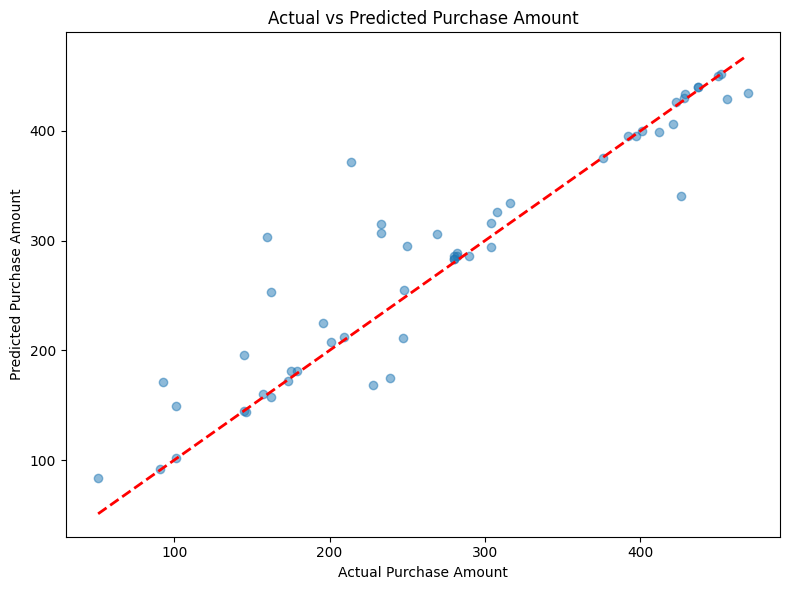

In [ ]:
# Plot actual vs predicted for the best model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, best_model.predict(X_test), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Purchase Amount')
plt.ylabel('Predicted Purchase Amount')
plt.title('Actual vs Predicted Purchase Amount')
plt.tight_layout()
plt.show()